Loading data for Day 1 and 2
Loaded data for Day 1 and 2


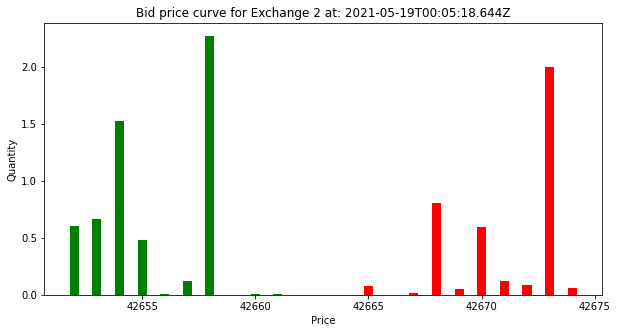

Calculating bid prices


In [3]:
'''The data is for the same instrument on two different exchanges over three days. We would like
you to develop a strategy over the first two days and to test on the third day. Your strategy could
be to trade the instrument on either or both of the exchanges. Ideally, your strategy trades tens
to hundreds of times per day. In this task, you can assume a trading fee of 1 basis point (or
0.01%). Also, please assume a trading latency of 100ms (time difference between order
placement and order fill).
'''

'''Data is of the form
“MatchingTime”, “ReceivingTime”, “Symbol”,
“BID_PRICE_1”, ”BID_QTY_1”, “ASK_PRICE_1”, “ASK_QTY_1”,
...
“BID_PRICE_10”, ”BID_QTY_10”, “ASK_PRICE_10”, “ASK_QTY_10”
Buy and Sells
'''

#Testing data for the interview
import zipfile #This is because the files are gz files.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
#from datetime import datetime
#import yfinance as yf

def crosscorr(datax, datay, lag=0):
    #Input: 2 panda dataframes and an integer lag to give an offset for the correlation
    #Output: Gives the correlation between datax and shifted datay AKA cross correlation
    return datax.corr(datay.shift(lag))

#Load Testing data of the 2 exchanges on day 1 and 2
print("Loading data for Day 1 and 2")
#Exchange 1
e1d1 = pd.read_csv('exchange1_20210519.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
e1d2 = pd.read_csv('exchange1_20210520.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
#Exchange 2
e2d1 = pd.read_csv('exchange2_20210519.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
e2d2 = pd.read_csv('exchange2_20210520.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
print("Loaded data for Day 1 and 2")

#Plot a bid sell curve
toPlot = list(e1d1.iloc[550])

priceBid = []
valBid = []
priceAsk = []
valAsk = []

for i in range(9):
    priceBid.append(toPlot[3 + 4*i ])
    valBid.append(toPlot[ 4 + 4*i ])
    priceAsk.append(toPlot[5 + 4*i ])
    valAsk.append(toPlot[ 6 + 4*i ])
    
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(priceBid, valBid, color ='g',
        width = 0.4)
plt.bar(priceAsk, valAsk, color ='r',
        width = 0.4)
 
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Bid price curve for Exchange 2 at: " + toPlot[0])
plt.show()

print("Calculating bid prices")
e1d1Bid = e1d1.iloc[:, [3,7,11,15,19,23,27,31,35,39] ].max(axis=1)
e1d2Bid = e1d2.iloc[:, [3,7,11,15,19,23,27,31,35,39] ].max(axis=1)

e2d1Bid = e2d1.iloc[:, [3,7,11,15,19,23,27,31,35,39] ].max(axis=1)
e2d2Bid = e2d2.iloc[:, [3,7,11,15,19,23,27,31,35,39] ].max(axis=1)

Testing latency arbitrage with cross-correlation


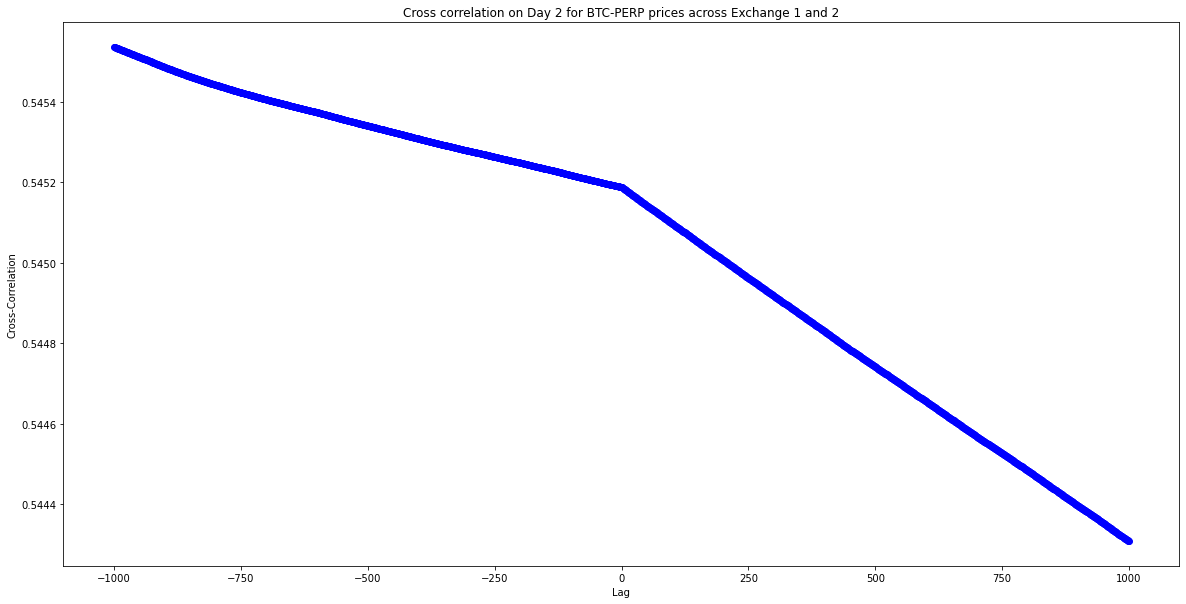

0
-1000


In [4]:
#
#
#Testing latency arb. Perform Cross-correlations of stock on different and same exchanges. Check for 
#
#

print("Testing latency arbitrage with cross-correlation")
lagArray = range(-1000,1000)
corrArray = []
for x in lagArray:
    corrArray.append( crosscorr( e1d2Bid , e2d2Bid , x) )

#Plot the correlation
fig = plt.figure(figsize = (20, 10))
 
plt.scatter(lagArray, corrArray, color ='b')

plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.title("Cross correlation on Day 2 for BTC-PERP prices across Exchange 1 and 2")
plt.show()
#Find the location of max
indexMax = np.argmax(corrArray)
print(indexMax)
print( (indexMax - 1000) )

Testing stat arb
Finding correlation matrix


<AxesSubplot:>

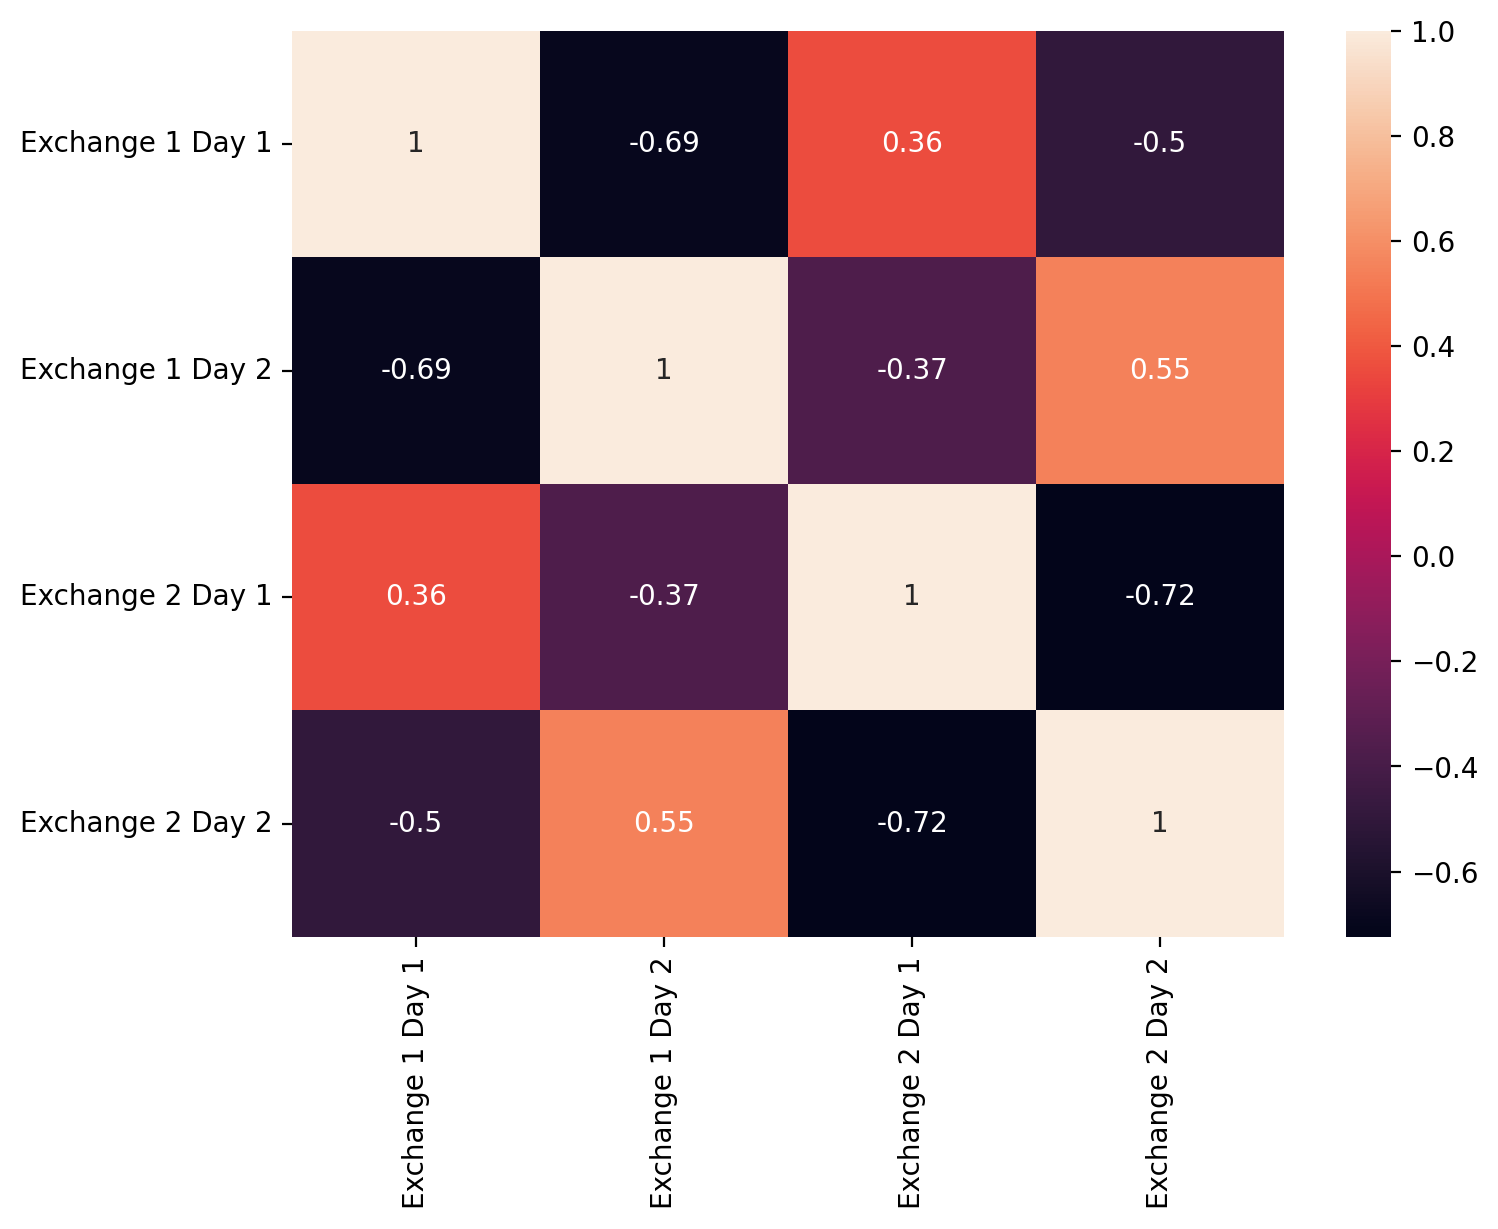

In [5]:
#
#
#Testing stat arb/pair trades. Done by finding correlations between all the assets
#
#

print("Testing stat arb")
print("Finding correlation matrix")
d = pd.concat([ e1d1Bid, e1d2Bid, e2d1Bid, e2d2Bid], axis=1)
corr_matrix = d.corr()

#Make a heatmap of the coorelations
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True, xticklabels=["Exchange 1 Day 1","Exchange 1 Day 2","Exchange 2 Day 1","Exchange 2 Day 2"], yticklabels=["Exchange 1 Day 1","Exchange 1 Day 2","Exchange 2 Day 1","Exchange 2 Day 2"])

Performing sentiment analysis


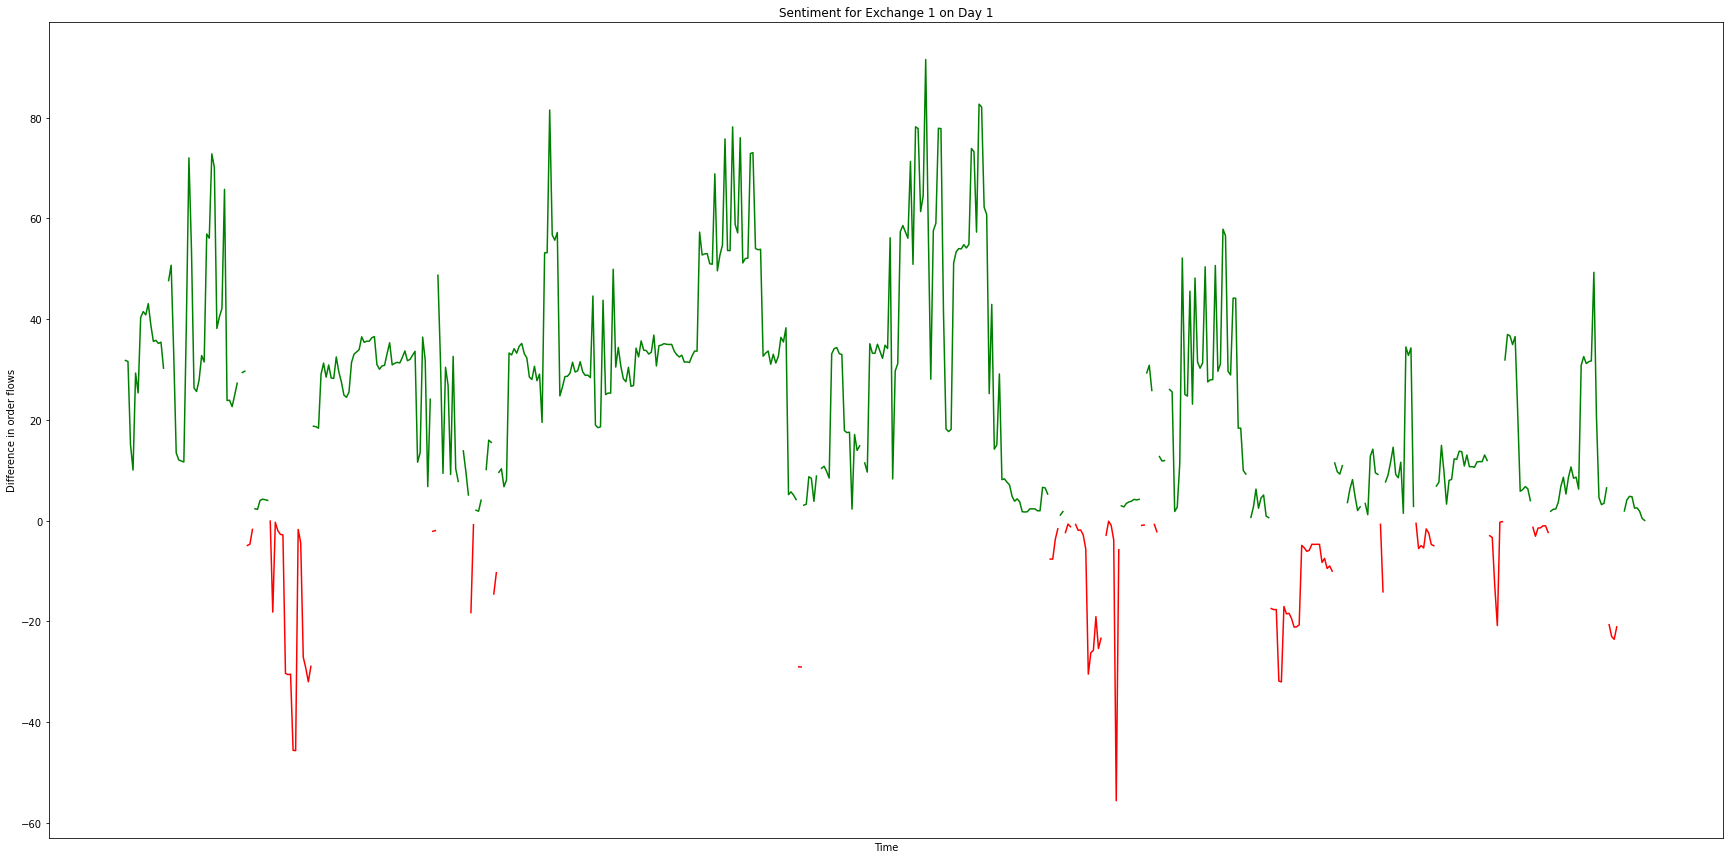

In [6]:
#
#
#Sentiment Analysis
#
#

#Test for a positive or negative sentiment by seeing if the majority of orders are buy or sells
print("Performing sentiment analysis")
sentiment1 = e1d1.iloc[:, 4] - e1d1.iloc[:, 6]
for i in range(9):
    sentiment1 += e1d1.iloc[:, 4*i + 8] - e1d1.iloc[:, 4*i + 10]
    
#Finding Exchange 2 data
sentiment2 = e2d1.iloc[:, 4] - e2d1.iloc[:, 6]
for i in range(9):
    sentiment2 += e2d1.iloc[:, 4*i + 8] - e2d1.iloc[:, 4*i + 10]


#Plotting the first few sentiments
size = 600
x = (e1d1.iloc[:, 0])[0:size]
y = sentiment1[0:size]
below = np.ma.masked_where(y > 0, y)
upper = np.ma.masked_where(y < 0, y)
fig, ax = plt.subplots(figsize = (30, 15))
ax.plot(x, below, 'r', x, upper, 'g')
plt.figsize = (20, 10)
plt.xlabel("Time")
plt.xticks([])
plt.ylabel("Difference in order flows")
plt.title("Sentiment for Exchange 1 on Day 1")
plt.show()

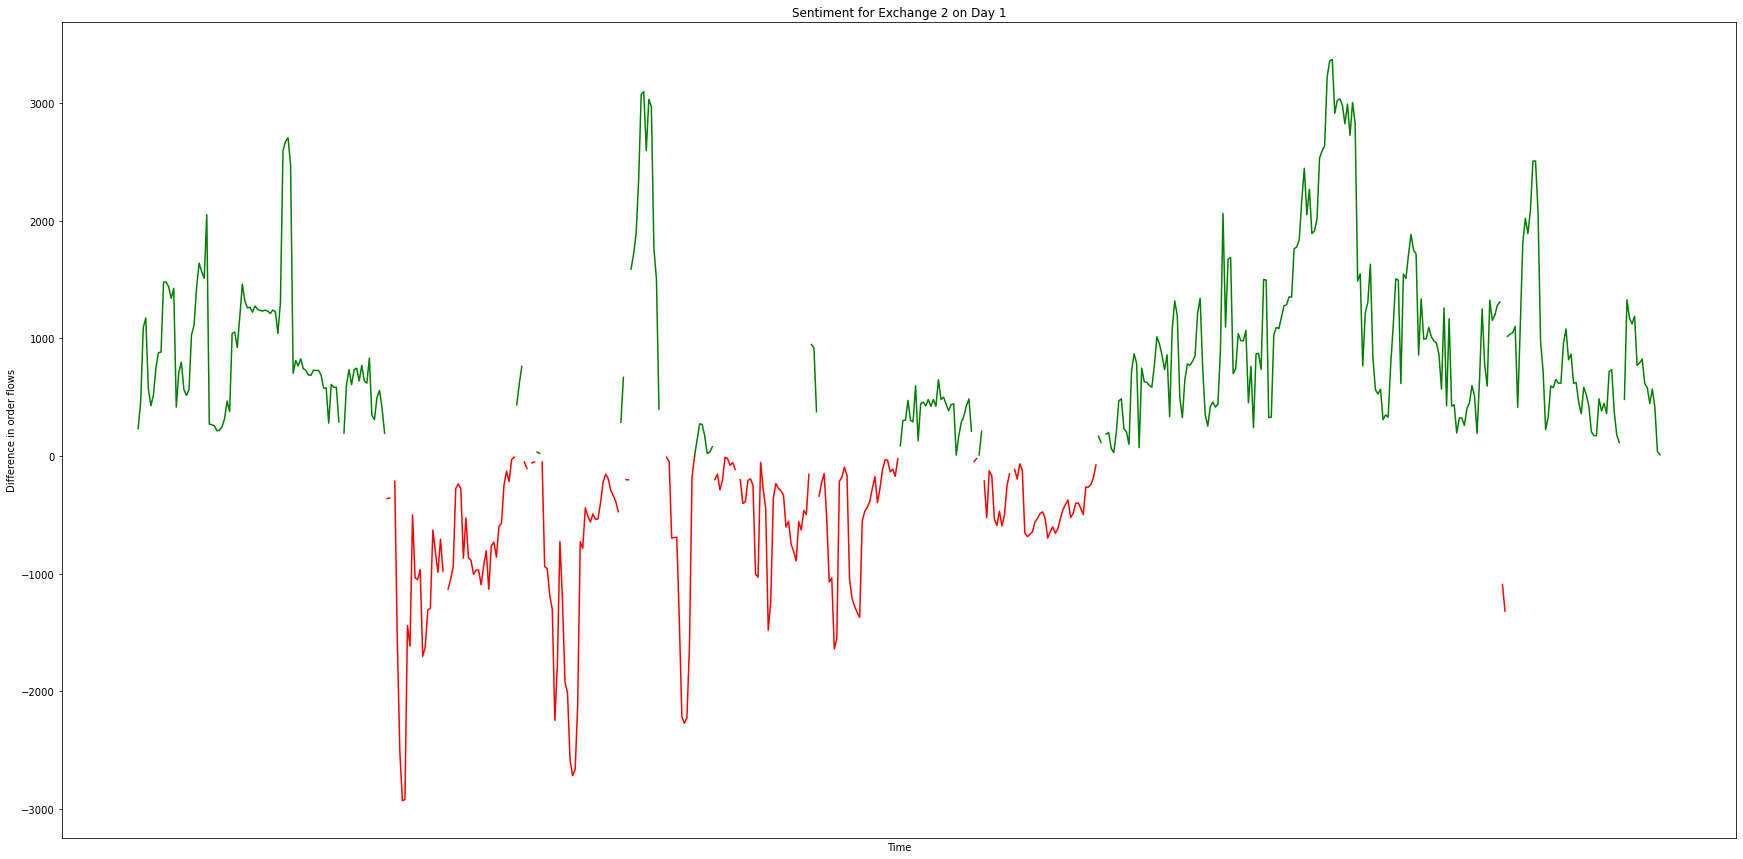

In [7]:
#Second graph
x = (e2d1.iloc[:, 0])[0:size]
y = sentiment2[0:size]
below = np.ma.masked_where(y > 0, y)
upper = np.ma.masked_where(y < 0, y)
fig, ax = plt.subplots(figsize = (30, 15))
ax.plot(x, below, 'r', x, upper, 'g')
plt.figsize = (20, 10)
plt.xlabel("Time")
plt.xticks([])
plt.ylabel("Difference in order flows")
plt.title("Sentiment for Exchange 2 on Day 1")
plt.show()

Testing sentiment latency with cross-correlation
plotting


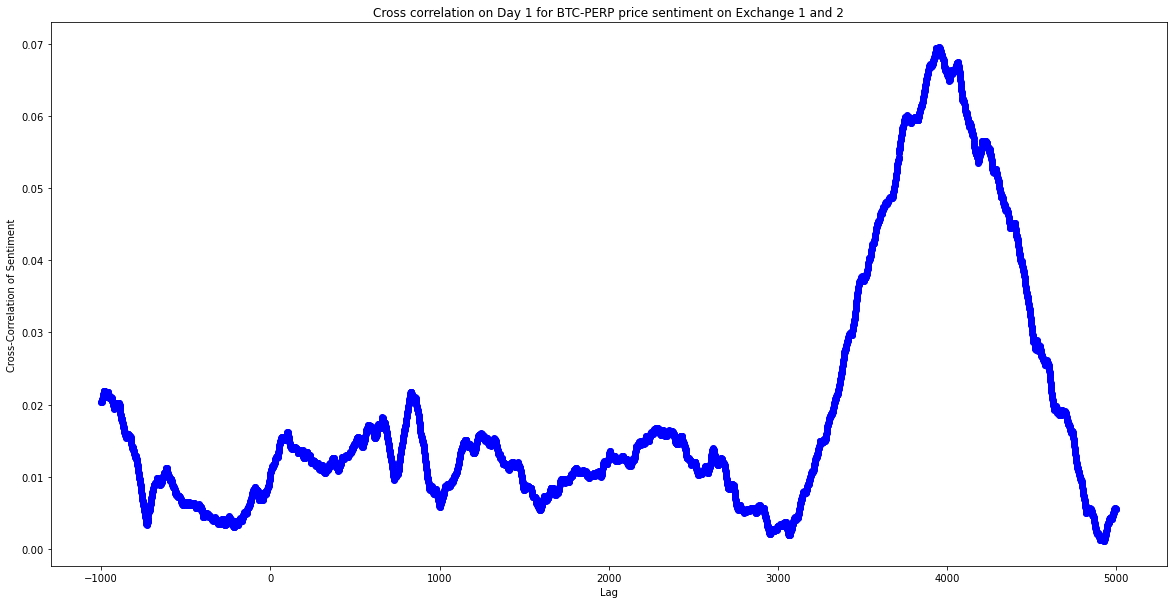

Max lag at: 3955


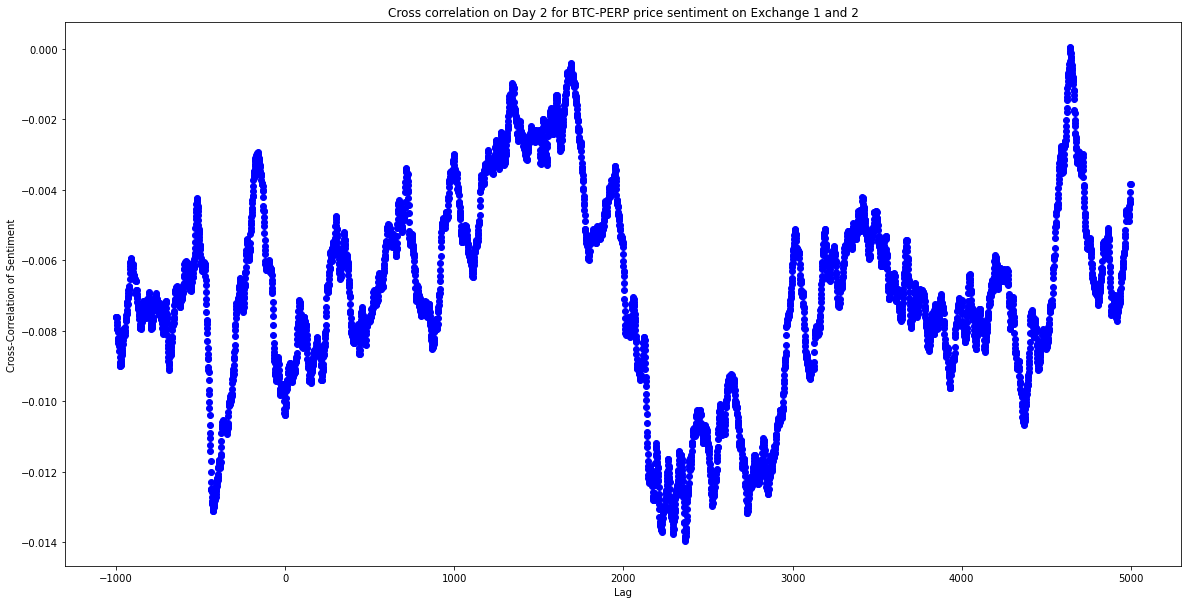

Max lag at: 4642


In [8]:
#
#Perform a sentiment cross correlation on these for Day 1. 
#

print("Testing sentiment latency with cross-correlation")
lagArray = range(-1000,5000)
corrArray = []
for x in lagArray:
    corrArray.append( crosscorr( sentiment1 , sentiment2 , x) )

print("plotting")
#Plot the cross-correlation on Day 1
fig = plt.figure(figsize = (20, 10))
plt.scatter(lagArray, corrArray, color ='b')
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation of Sentiment")
plt.title("Cross correlation on Day 1 for BTC-PERP price sentiment on Exchange 1 and 2")
plt.show()
#Find the location of max
indexMax = np.argmax(corrArray)
print("Max lag at:", indexMax - 1000 ) #1000 as that's the lower bound for the lag

#SENTIMENT on DAY 2
sentiment1d2 = e1d2.iloc[:, 4] - e1d2.iloc[:, 6]
for i in range(9):
    sentiment1d2 += e1d2.iloc[:, 4*i + 8] - e1d2.iloc[:, 4*i + 10]
    
sentiment2d2 = e2d2.iloc[:, 4] - e2d2.iloc[:, 6]
for i in range(9):
    sentiment2d2 += e2d2.iloc[:, 4*i + 8] - e2d2.iloc[:, 4*i + 10]

lagArray = range(-1000,5000)
corrArray = []
for x in lagArray:
    corrArray.append( crosscorr( sentiment1d2 , sentiment2d2 , x) )

#Plot the cross-correlation on Day 2
fig = plt.figure(figsize = (20, 10))
plt.scatter(lagArray, corrArray, color ='b')
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation of Sentiment")
plt.title("Cross correlation on Day 2 for BTC-PERP price sentiment on Exchange 1 and 2")
plt.show()
#Find the location of max
indexMax = np.argmax(corrArray)
print("Max lag at:", indexMax - 1000 ) #5000 as that's the lower bound for the lag

Performing Dickey-Fuller tests
P value for the Augmented Dickey-Fuller Test on E1 D1 for sentiment is 1.8102695899485087e-24
P value for the Augmented Dickey-Fuller Test on E2 D1 for sentiment is 1.6321591456131251e-21
P value for the Augmented Dickey-Fuller Test on E1 D1 for sentiment is 6.190926268725454e-20
P value for the Augmented Dickey-Fuller Test on E2 D2 for sentiment is 4.335131745185107e-20


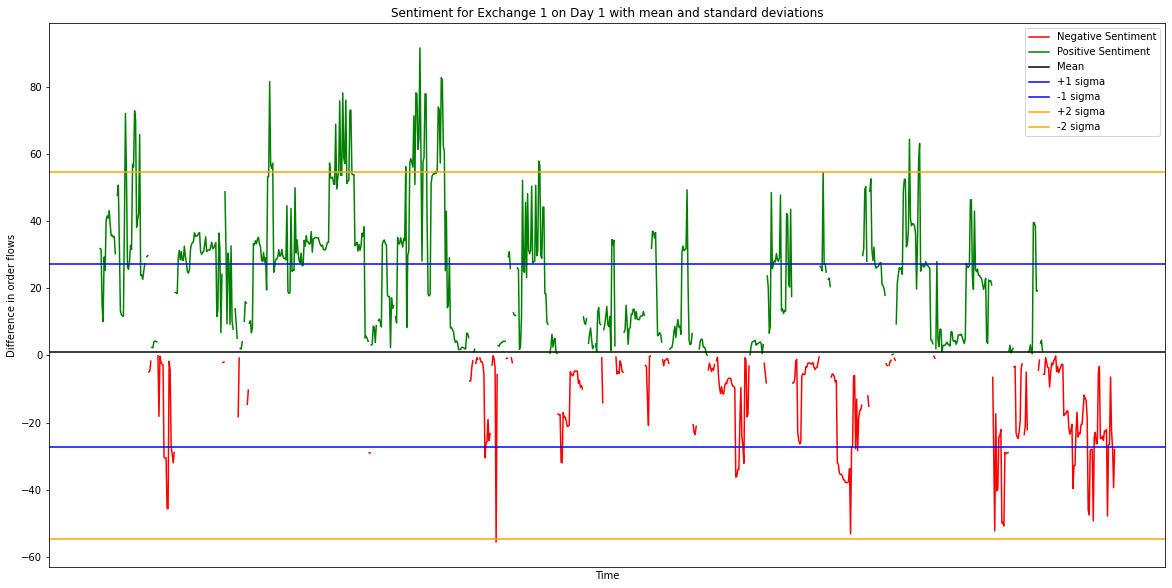

In [9]:
#
#
#Perform augmented Dickey fuller tests to see if sentiment is stationary.
#
#

print("Performing Dickey-Fuller tests")
from statsmodels.tsa.stattools import adfuller
adf_e1d1 = adfuller(sentiment1[0:5000])
print('P value for the Augmented Dickey-Fuller Test on E1 D1 for sentiment is', adf_e1d1[1])
adf_e2d1 = adfuller(sentiment2[0:5000])
print('P value for the Augmented Dickey-Fuller Test on E2 D1 for sentiment is', adf_e2d1[1])
adf_e1d2 = adfuller(sentiment1d2[0:5000])
print('P value for the Augmented Dickey-Fuller Test on E1 D1 for sentiment is', adf_e1d2[1])
adf_e2d2 = adfuller(sentiment2d2[0:5000])
print('P value for the Augmented Dickey-Fuller Test on E2 D2 for sentiment is', adf_e2d2[1])

#Show sentiment plot with mean and difference from standard deviation
x = (e1d1.iloc[:, 0])[0:1000]
y = sentiment1[0:1000] #Make this the one with the lowest ADF p-value

below = np.ma.masked_where(y > 0, y)
upper = np.ma.masked_where(y < 0, y)

mean = sentiment1.mean()
sigma = sentiment1.std()

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x, below, 'r', x, upper, 'g')
plt.axhline(mean, color='black') #Plot the mean sentiment line
plt.axhline(1.0*sigma, color='blue') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(-1.0*sigma, color='blue') # 95% of our data will lie between these bounds.
plt.axhline(2*sigma, color='orange') # 68% of our data will lie between these bounds.
plt.axhline(-2*sigma, color='orange') # 95% of our data will lie between these bounds.
plt.xlabel("Time")
plt.xticks([])
plt.ylabel("Difference in order flows")
plt.title("Sentiment for Exchange 1 on Day 1 with mean and standard deviations")
plt.legend(['Negative Sentiment', 'Positive Sentiment','Mean', '+1 sigma','-1 sigma','+2 sigma','-2 sigma'])
plt.show()

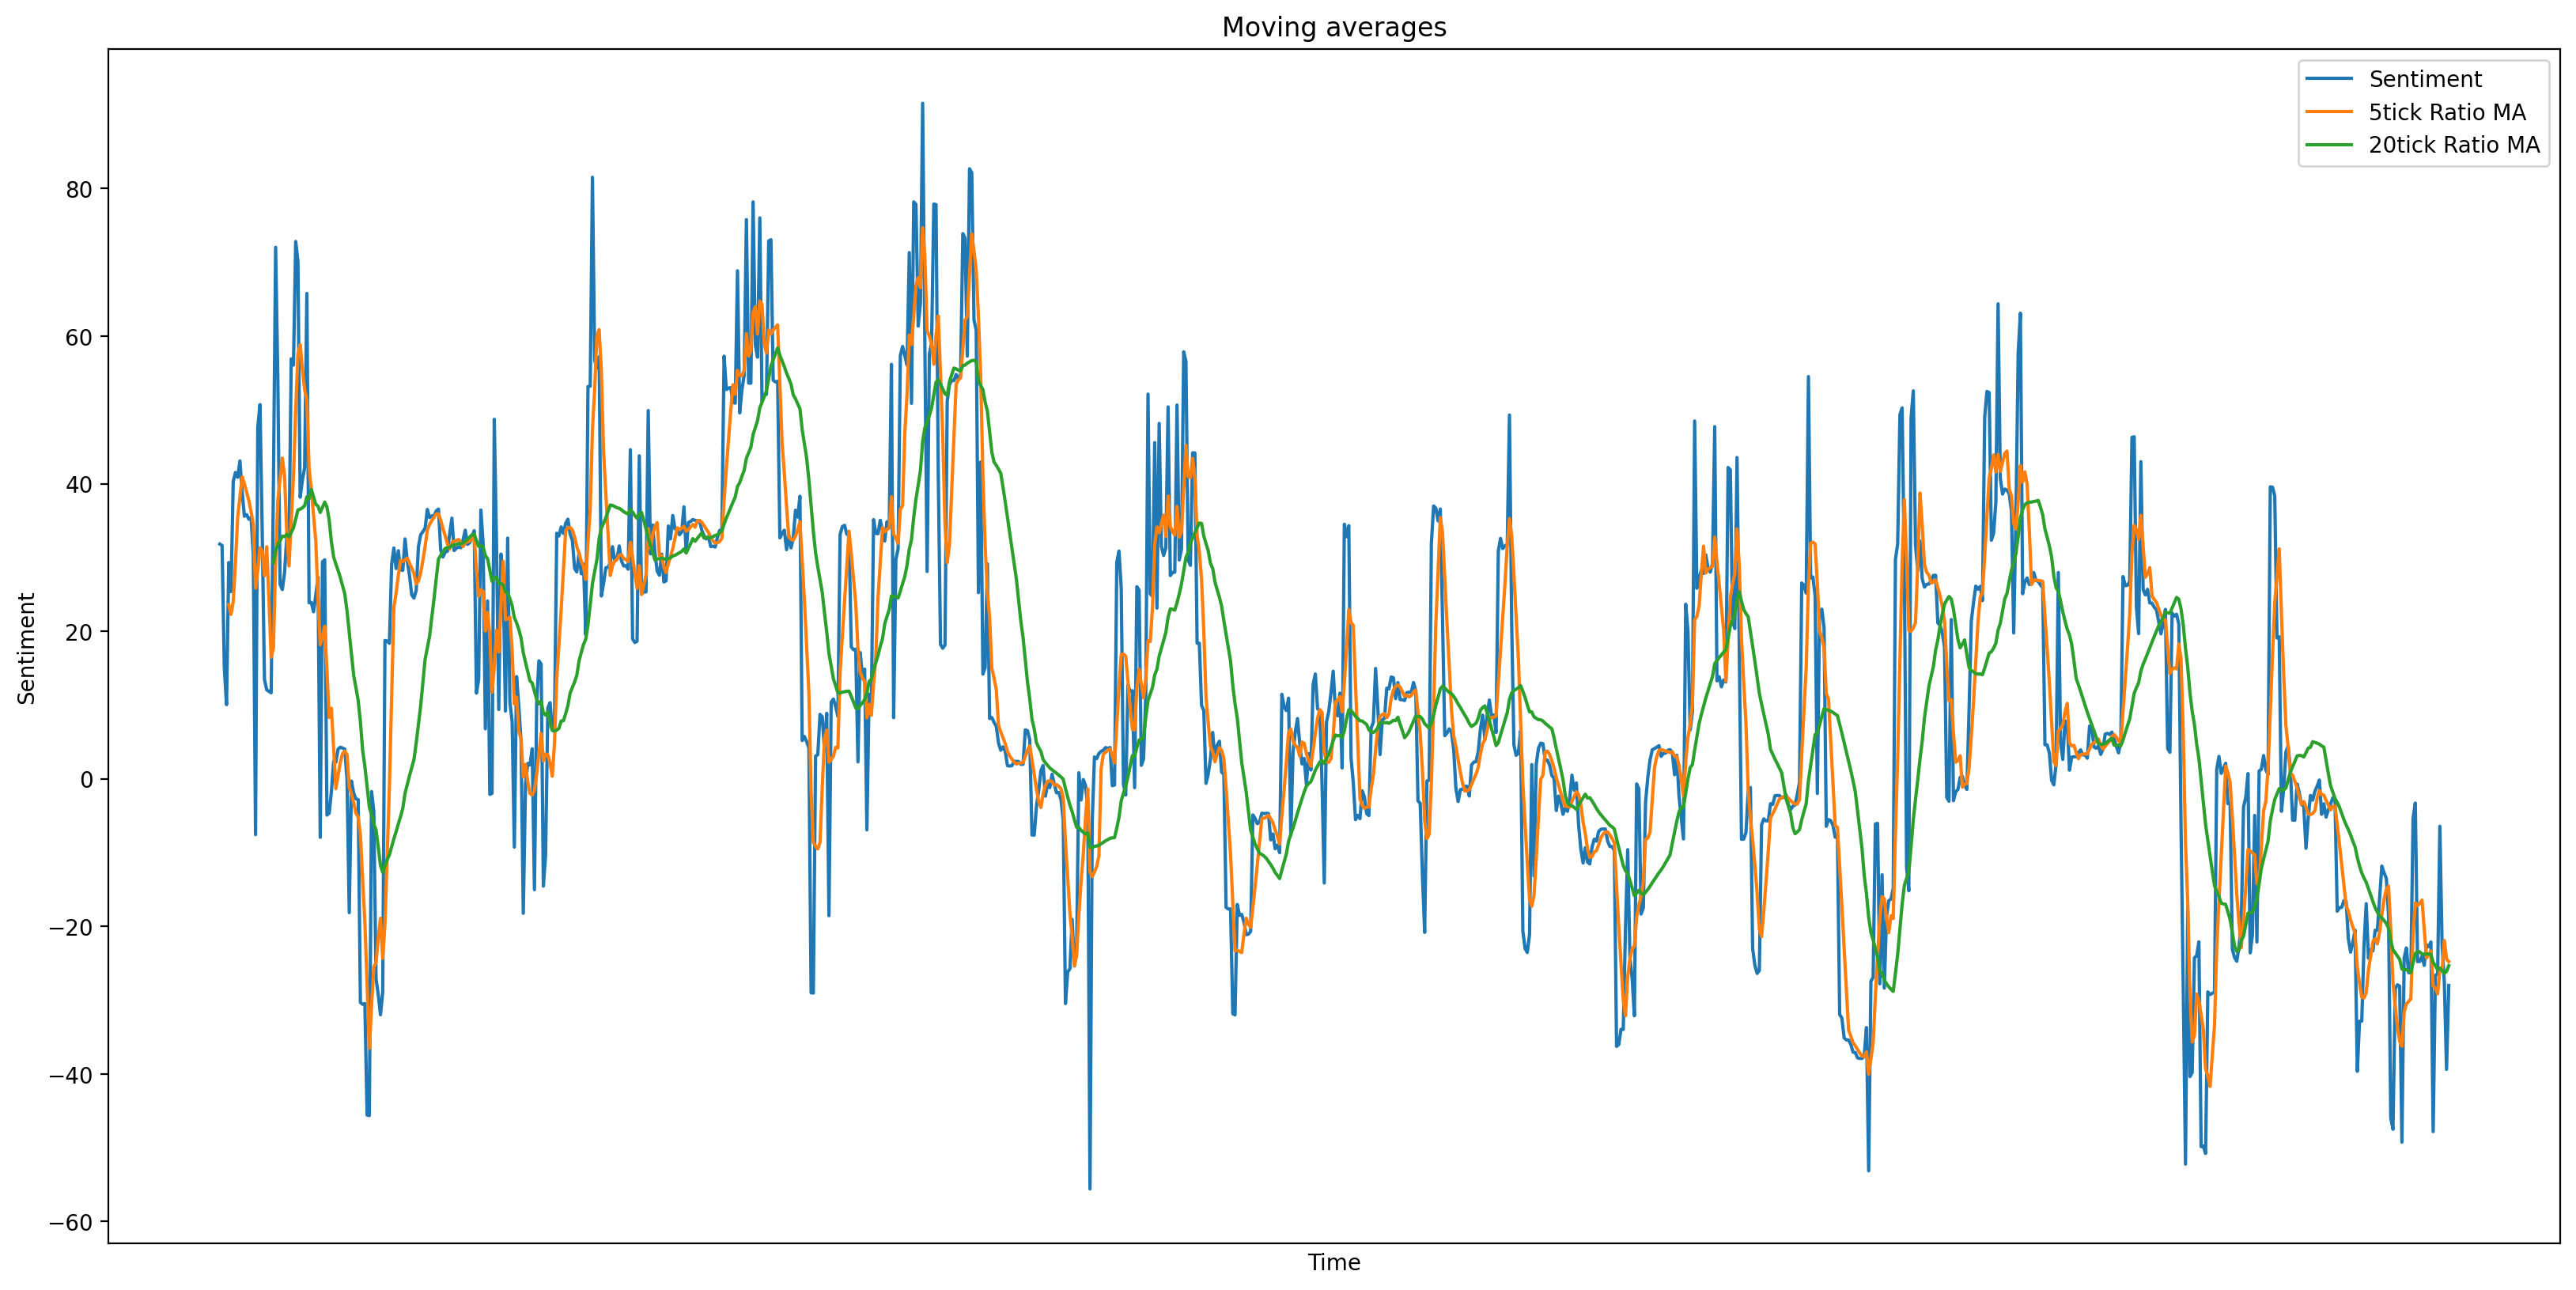

<Figure size 432x288 with 0 Axes>

In [10]:
#Moving average
ratios_mavg5 = y.rolling(window=5, center=False).mean()
ratios_mavg20 = y.rolling(window=25, center=False).mean()
std_20 = y.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
#Plotting moving average figure
fig = plt.figure(figsize = (20, 10), dpi=200)
plt.plot(x, y)
plt.plot(x, ratios_mavg5.values)
plt.plot(x, ratios_mavg20.values)
plt.legend(['Sentiment', '5tick Ratio MA', '20tick Ratio MA'])
plt.xlabel('Time')
plt.xticks([])
plt.ylabel('Sentiment')
plt.title("Moving averages")
plt.show()
plt.savefig("movingAverage.png", bbox_inches="tight",pad_inches=0.3)

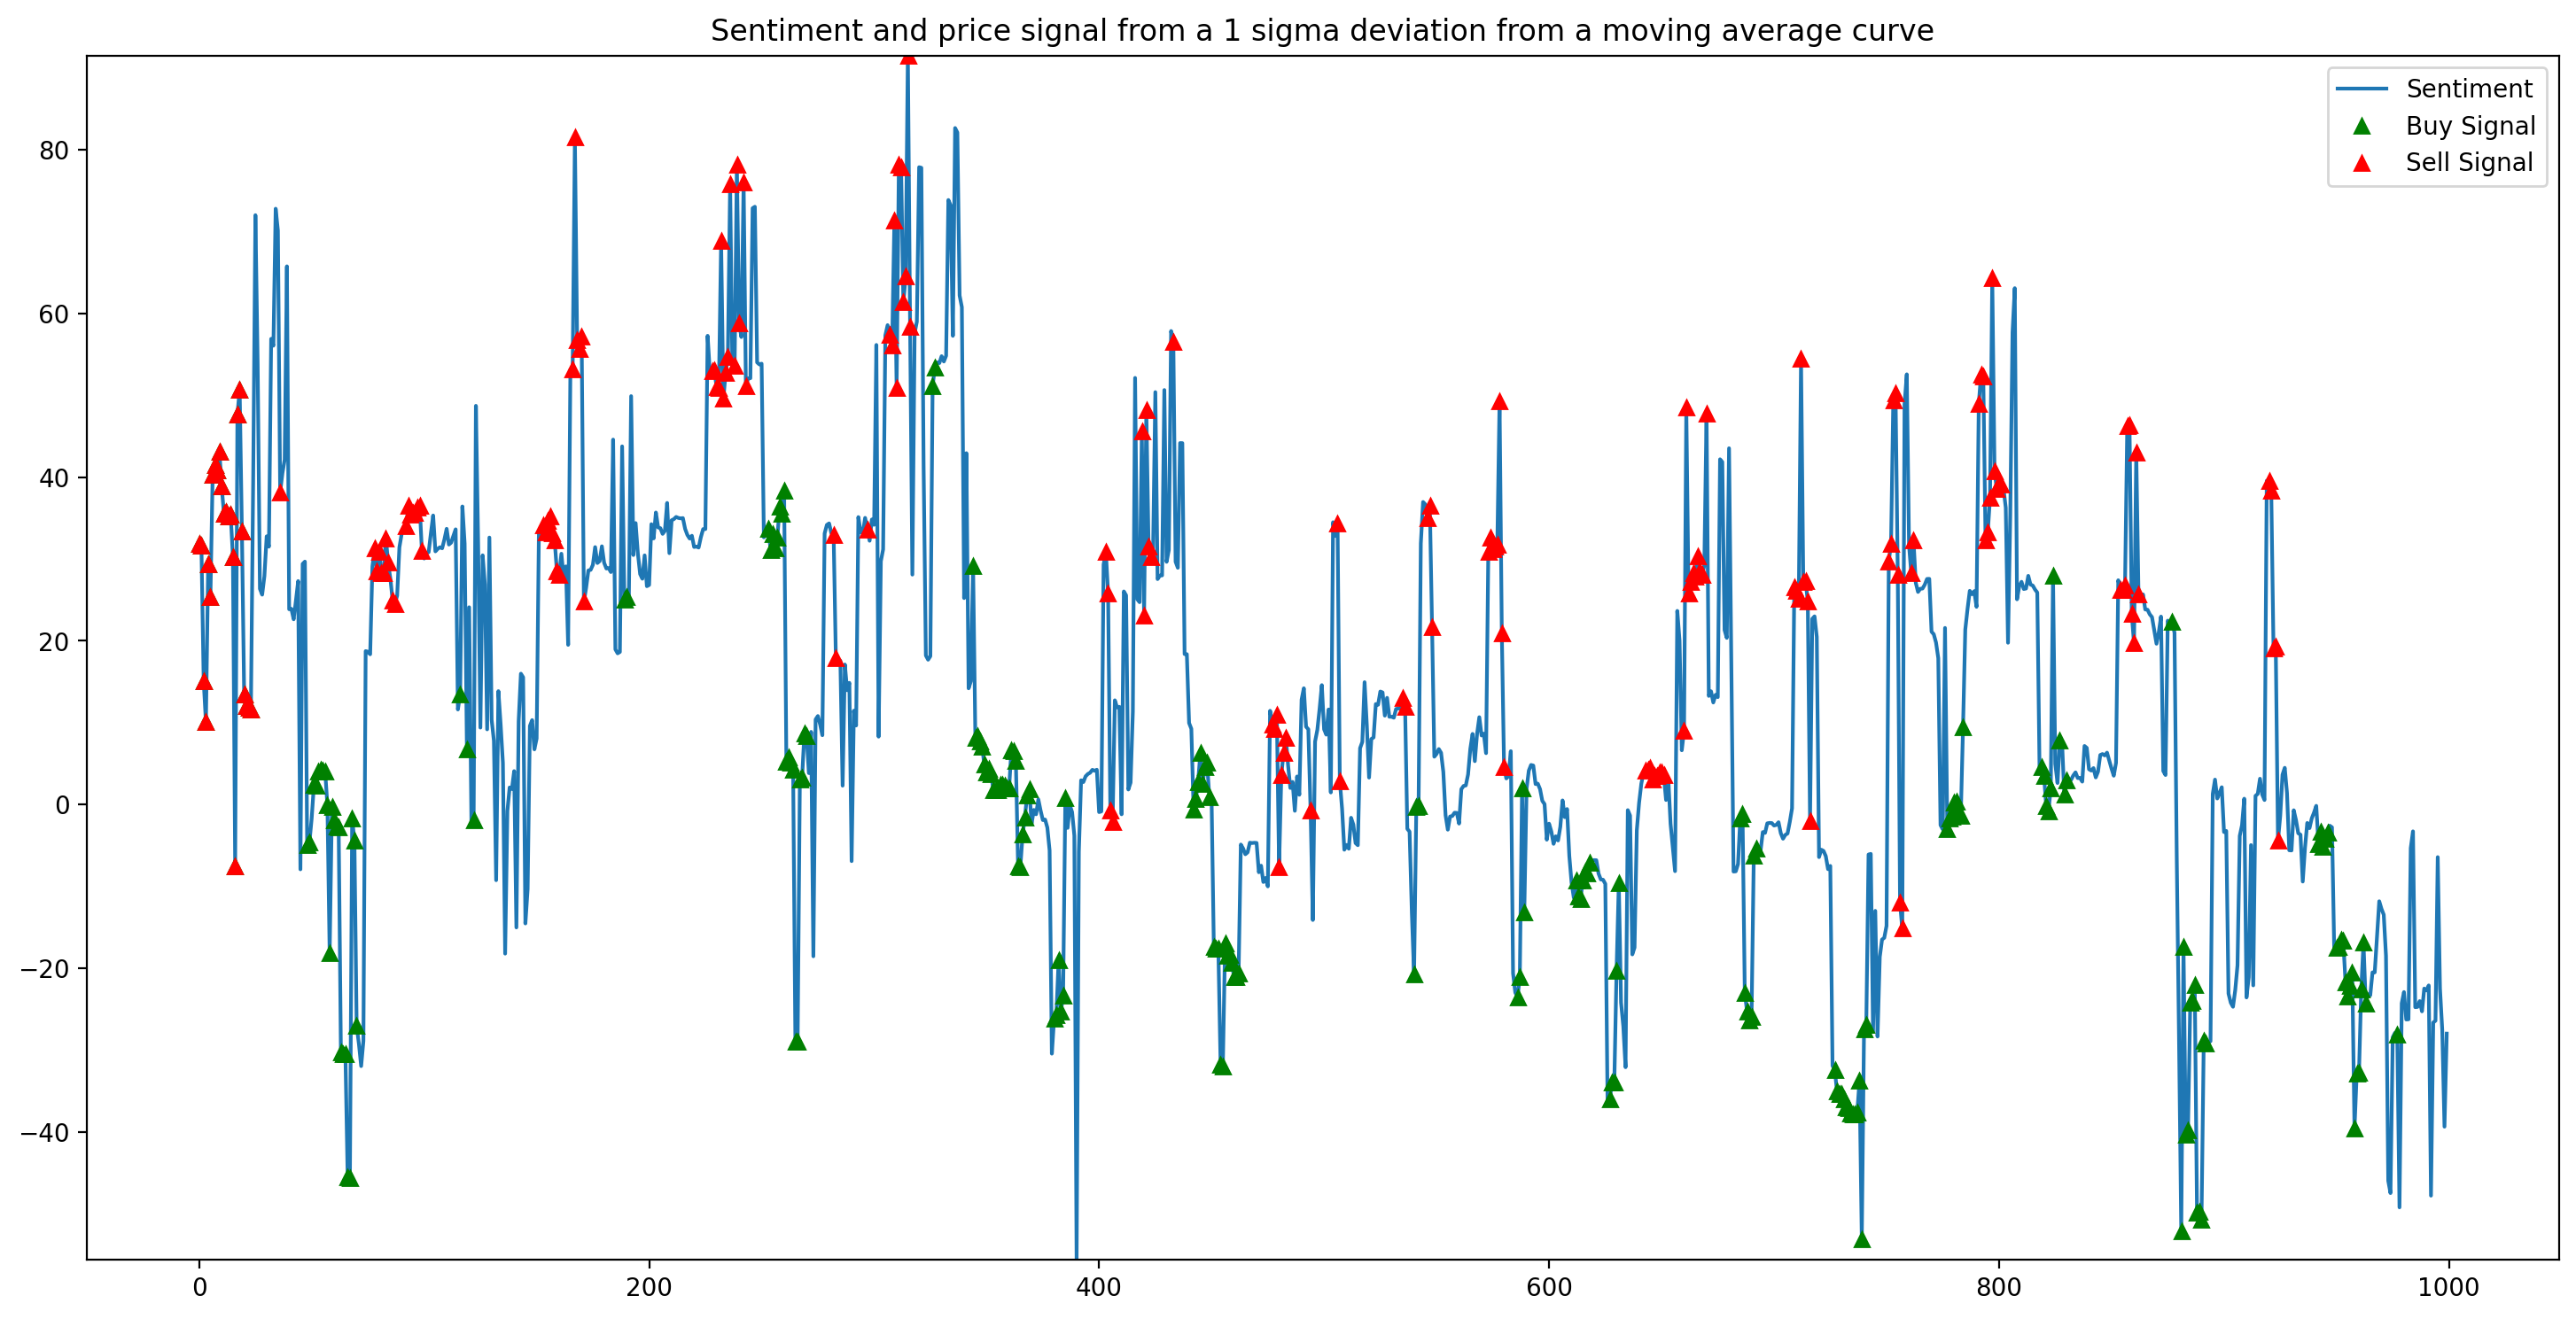

<Figure size 432x288 with 0 Axes>

In [11]:
#Find and plot signals
fig = plt.figure(figsize = (18, 9), dpi=200)
y.plot() #Plot the original sentiment
#Generate signals
buy = y.copy()
sell = y.copy()
buy.drop(buy[zscore_20_5>-1].index, inplace=True) #Buy signals
sell.drop(sell[zscore_20_5<1].index, inplace=True) #Sell signals
#Plot
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y.min(), y.max())) #Scale so max and min are on y-axis
plt.legend(['Sentiment', 'Buy Signal', 'Sell Signal'])
plt.title('Sentiment and price signal from a 1 sigma deviation from a moving average curve')
plt.show()
plt.savefig("priceSignal.png", bbox_inches="tight",pad_inches=0.3)

In [12]:
#
#
#Try strategy on Day 3!
#
#

#Test profitable with seeing how many buy and sell signals we have
#If you buy and was a previous sell then close it and profit else wait for a sell signal
print("Day 3")
buyCount,sellCount = 0,0
print("Reading Day 3 data")
e1d3 = pd.read_csv('exchange1_20210521.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
e2d3 = pd.read_csv('exchange2_20210521.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

#Generate the buy and sell prices
e1d3Bid = e1d3.iloc[:, [3,7,11,15,19,23,27,31,35,39] ].max(axis=1) #Buy prices on Ex1 for Day 3
e2d3Bid = e2d3.iloc[:, [3,7,11,15,19,23,27,31,35,39] ].max(axis=1)

e1d3Ask = e1d3.iloc[:, [5,9,13,17,21,25,29,33,37,41] ].max(axis=1) #Sells
e2d3Ask = e2d3.iloc[:, [5,9,13,17,21,25,29,33,37,41] ].max(axis=1)

Day 3
Reading Day 3 data


In [13]:
#Generate sentiment to test for signals
print("Generating sentiment")
sentiment1d3 = e1d3.iloc[:, 4] - e1d3.iloc[:, 6]
for i in range(9):
    sentiment1d2 += e1d3.iloc[:, 4*i + 8] - e1d3.iloc[:, 4*i + 10]
    
sentiment2d3 = e2d3.iloc[:, 4] - e2d3.iloc[:, 6]
for i in range(9):
    sentiment2d2 += e2d3.iloc[:, 4*i + 8] - e2d3.iloc[:, 4*i + 10]
    
#Generate signals from sentiment
print("Generating signals for Day 3")
y = sentiment1d3[0:1000]
sentD3_mavg5 = y.rolling(window=5, center=False).mean()
sentD3_mavg20 = y.rolling(window=20, center=False).mean()
std_20 = y.rolling(window=20, center=False).std()
zscore_20_5 = (sentD3_mavg5 - sentD3_mavg20)/std_20
buy = y.copy()
sell = y.copy()
buy.drop(buy[zscore_20_5>-1].index, inplace=True) #Buy signals
sell.drop(sell[zscore_20_5<1].index, inplace=True) #Sell signals
#See profit
print("See profit")
totalProfit = 0
    
for x in sell.iteritems():
    totalProfit -= (e1d3Ask.iloc[x[0]] + 1)

for x in buy.iteritems():
    totalProfit += (e1d3Bid.iloc[x[0]] - 1)
    
print("Total profit in basis points is:", totalProfit)

Generating sentiment
Generating signals for Day 3
See profit
Total profit in basis points is: 2079189.0
